# Lab02 - Coding Exercise

In [48]:
import numpy as np
import os
from matplotlib import pyplot as plt

from scipy.optimize import curve_fit

We use

## Postlab Q2 - Sensor Noise Analysis

Prior to starting this exercise, make sure to already have generated three `.txt` files containing 50 datapoints each (check the lab procedures again if you haven't done this yet). We assume that all data is stored in the same directory. </br>


*Plot* and *compare* the *average* and *standard deviation* when 1, 20, and 200 consecutive voltage values are averaged into a single data point. </br>
**Always label your axis and specify their units.**


Explain your observations and conclusions.

In [49]:
# Enter the path of folder where your .txt are stored
data_dir = r"lab02/mP/lab02_skeleton.ipynb"
voltage_data_files = ['voltage_data_a.txt', 'voltage_data_b.txt', 'voltage_data_c.txt']

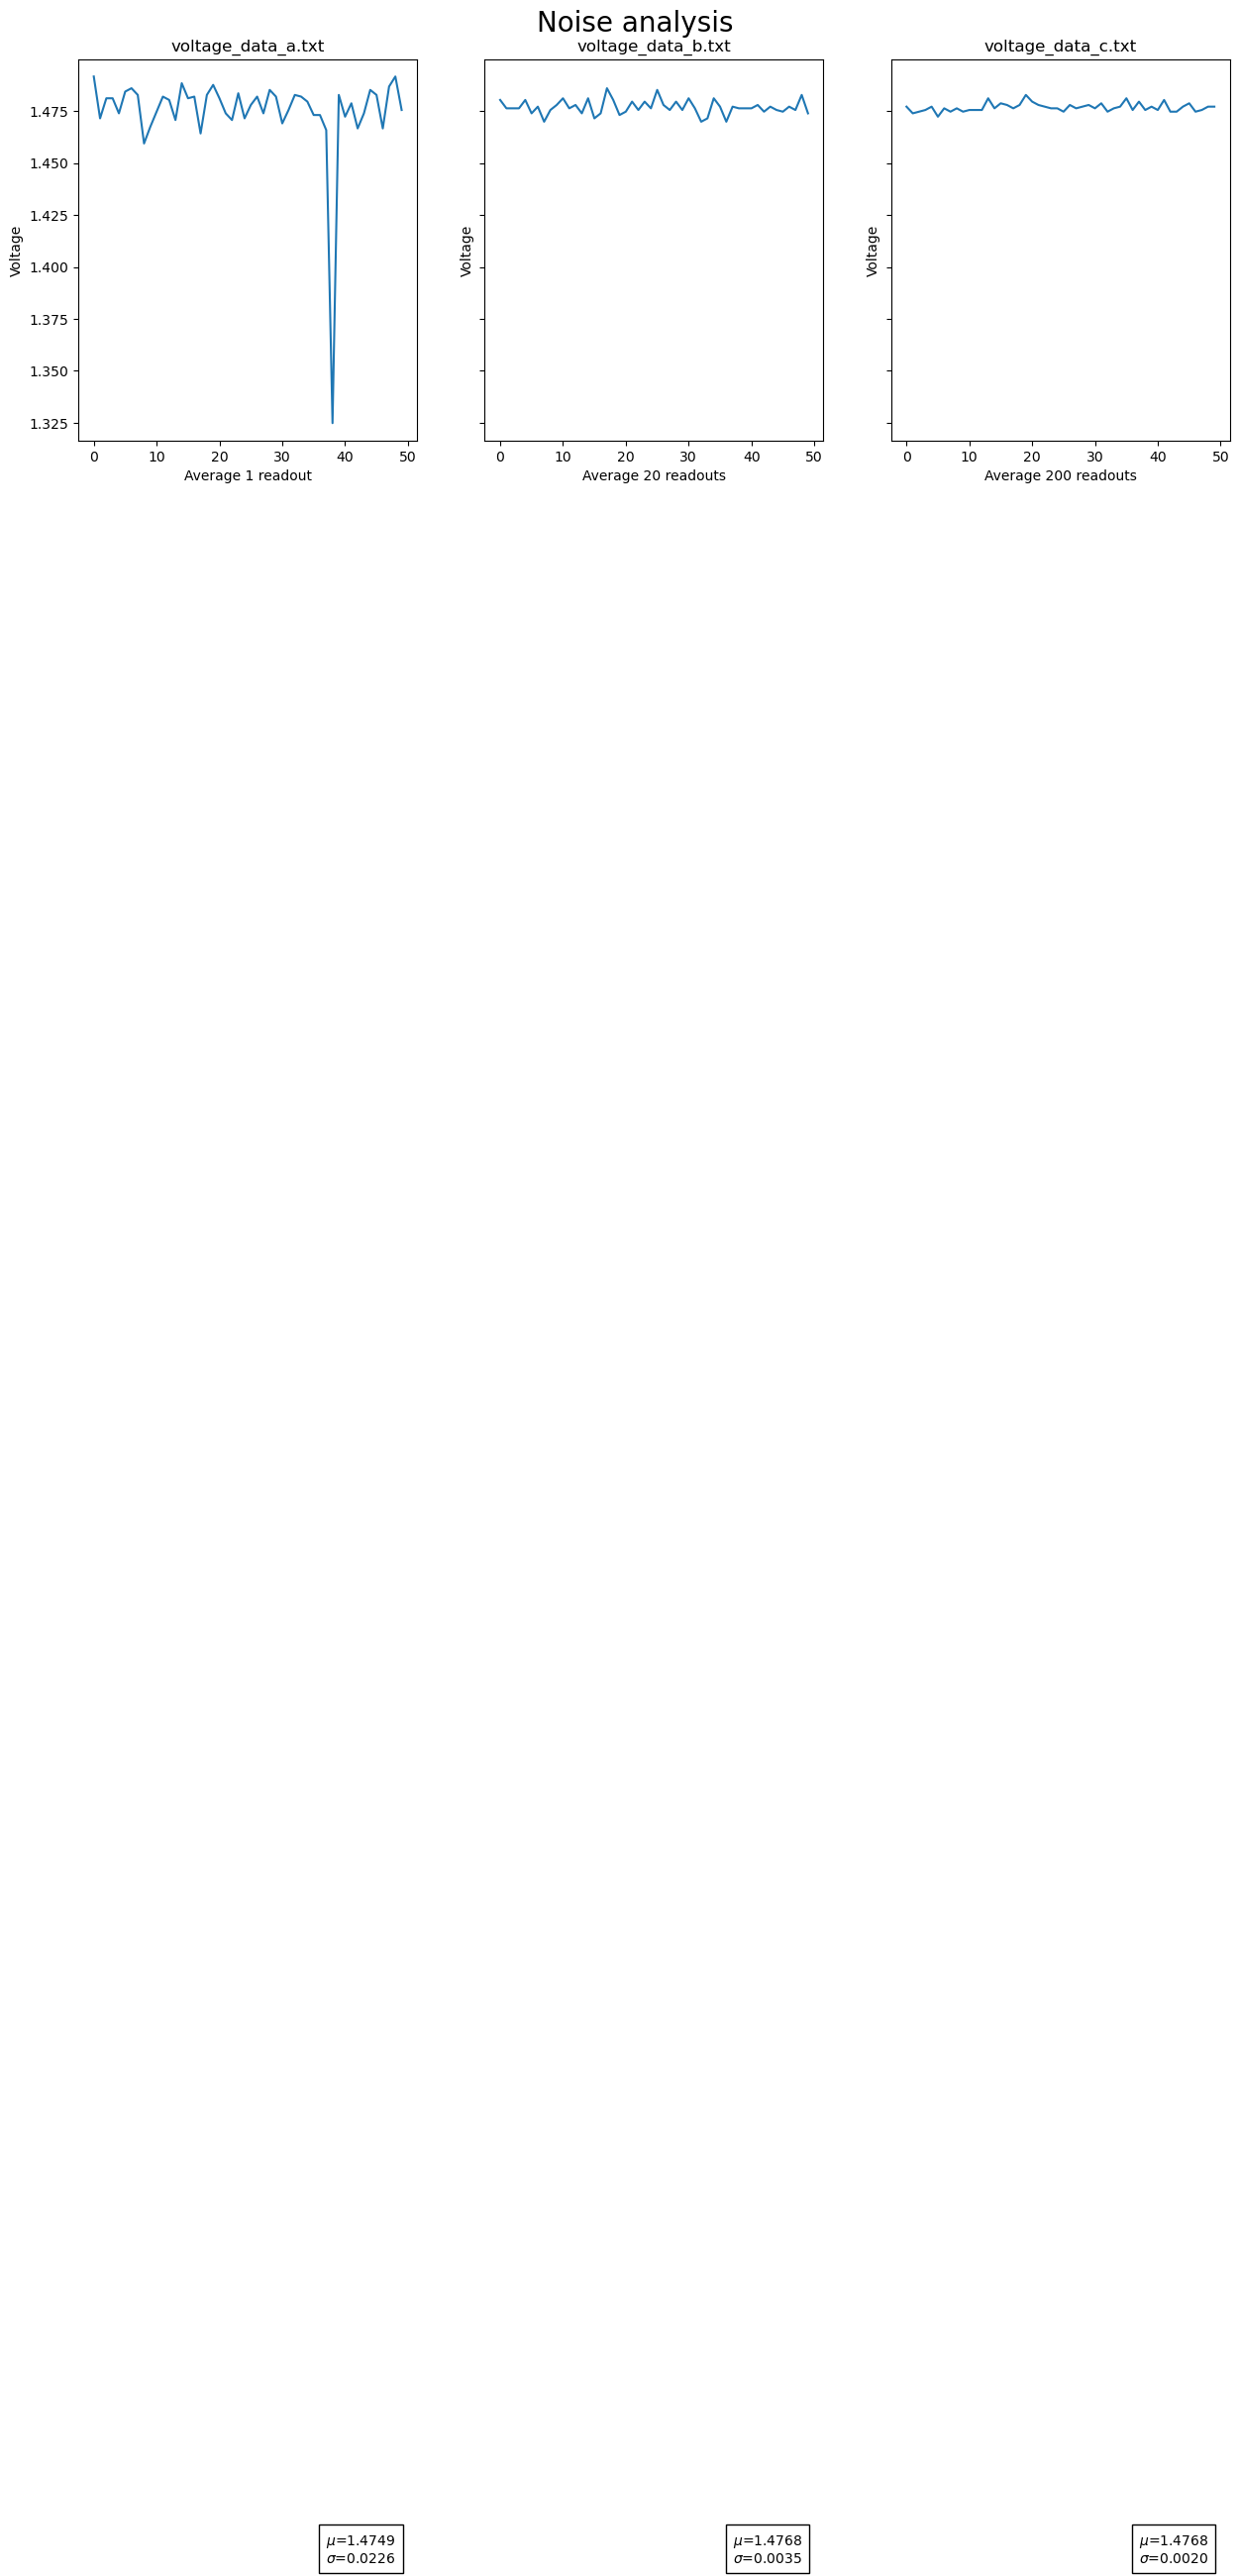

In [50]:
# Create a figure with 3 plots side-by-side to compare sensor noise when averaging a different number of datapoints
# sharey=True makes sure that the y-axis is the same for all plots and to make it easier to compare the difference in noise
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(15,5))   #Create three subplots
fig.suptitle('Noise analysis', fontsize=20)   #Add big title

axs[0].set_ylabel('Voltage')
axs[1].set_ylabel('Voltage')
axs[2].set_ylabel('Voltage')

axs[0].set_xlabel('Average 1 readout')
axs[1].set_xlabel('Average 20 readouts')
axs[2].set_xlabel('Average 200 readouts')

for file_num, file in enumerate(voltage_data_files):
    path = os.path.join(data_dir, file)
    v_data = np.loadtxt(voltage_data_files[file_num])
    


    axs[file_num].plot(v_data)
    # Plot title will be set as the file name.
    axs[file_num].set_title(file)

    # Calculate mean and standard deviation for dataset
    mean = np.mean(v_data)
    std  = np.std(v_data)
    
    

    axs[file_num].text(37, 0.295, f'$\mu$={mean:.4f}\n$\sigma$={std:.4f}',
                       bbox={'facecolor': 'white', 'alpha': 1, 'pad': 5})

#fig.tight_layout()
plt.savefig('noise_analysis.png', dpi=300)
plt.show()




### Explain your observations and conclusions. </br>
___________________________________________________

<font color=red> The more we average the less the measurment noise which is nice</font>
___________________________________________________

## Postlab Q3 - Characterizing magnetic field decay of permanent magnet

As specified in the lab document, the magnetic field $B$ at a distance $z$ along the axis of symmetry of a cylindrical magnet is expressed as follows:

$$B(z) = \frac{B_r}{2} \left(\frac{D+z}{\sqrt{R^2+(D+z)^2}} - \frac{z}{\sqrt{R^2+z^2}}\right)$$

where $B_r$ is the remanence field at the surface of the magnet, D is the thickness of the magnet, and R is its radius.

First, plot the field vs distance and then use scipy's `curve_fit` function to fit a line to the measured values. </br>
While doing so, find the optimal $B_r$ that is used to fit the data.</br>
Bear in mind that the hall sensor saturates at a certain field value.</br>
Inspect whether this is the case by looking at the plot and disregard these values when fitting a curve to the data.</br>

You can save a figure using the command `plt.savefig(...)`

In [51]:
# Loading data from generated .txt file
field_path = os.path.join(data_dir, 'field_distance_V2.txt')

data  = np.loadtxt('field_distance_1.txt')
dist  = data[:,0]
field = data[:,1]

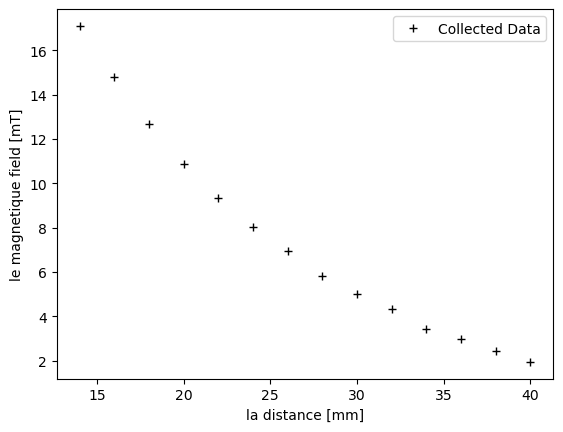

In [52]:
# first plotting the collected data to inspect for unusable data points (separate plot is optional)
plt.plot(dist, field, 'k+', label = 'Collected Data')
plt.legend()

# make sure that labels include units
plt.xlabel('la distance [mm]')
plt.ylabel('le magnetique field [mT]');

Scipy's `curve_fit` uses a non-linear least squares method to fit a function to the given data. </br>
`curve_fit`, mainly, takes 3 mandatory arguments: the function `f` to fit, the `xdata` (the distance in our case), and the `ydata` (the measured field, for us).

The function `f` defines the shape of the curve we wish to fit and must take one independent variable as the first argument and the parameters to fit as the remaining arguments. In our case the function `f` should take as argument `f(z, B_r)`. </br>


The function can be called as `curve_fit(f, xdata, ydata)` and will return `popt`, the optimal value of the parameters to fit, and `pcov`, the estimated covariance of the fitted parameters, which is not relevant for us.

You can look at the scipy documentation if you want more details on how the function works: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [53]:
D = 10 # in mm
R = 20 # in mm

def func(z, B_r):
    # Define the function to fit, where B_r is the optimized parameter to be found and z is the xdata coordinate
    f = (B_r/2)* ((D+z)/np.sqrt(R**2+(D+z)**2) - z/(np.sqrt(R**2+z**2)))
    return B_r/2 * f

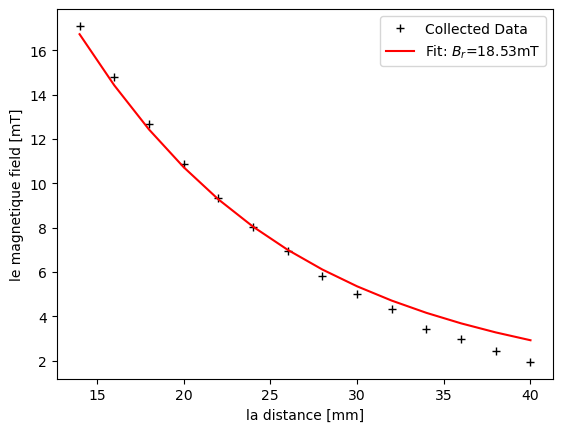

In [54]:
# Using scipy's curve_fit function to fit data using a non-linear least sqaures method
# provided function f(x, arg), the parameters provided after the first argument will be fit 

# curve_fit returns the optimal value of the parameter
popt, ___ = curve_fit(func, dist[:], field[:])

plt.plot(dist, field, 'k+', label = 'Collected Data')
plt.plot(dist, func(dist, *popt), 'r', label=f'Fit: $B_r$={popt[0]:.2f}mT')
plt.legend()

# make sure that labels include units
plt.xlabel('la distance [mm]')
plt.ylabel('le magnetique field [mT]');
plt.savefig('curve_fit.png', dpi=600)

